In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
market_demand = pd.read_csv("FACT_MARKET_DEMAND-001.csv")

In [3]:
market_demand.head()

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM
0,2021-08-21,524,DIET/LIGHT,SSD,69.0,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...
1,2022-05-07,637,REGULAR,SSD,4.0,30.96,COCOS,GORGEOUS ORANGEOUS,12SMALL 12ONE CUP,GORGEOUS SUNSET OUS GENTLE DRINK AVOCADO CUP ...
2,2022-10-22,628,DIET/LIGHT,ING ENHANCED WATER,1.0,2.25,JOLLYS,DIGRESS FLAVORED,20SMALL MULTI JUG,DIGRESS ZERO NUTRIENT ENHANCED WATER BVRG PURP...
3,2022-08-13,216,REGULAR,SSD,3.0,7.55,COCOS,CHERRY FIZZ,1L MULTI JUG,KOOL! RED GENTLE DRINK RED COLA CONTOUR JUG ...
4,2022-01-01,210,REGULAR,SSD,4.0,25.96,COCOS,RADIANT'S,12SMALL 12ONE CUP,RADIANT'S GENTLE DRINK GINGER ALE CUP 12 LIQUI...


# Q6

### Item Description: Diet Energy Moonlit Casava 2L Multi Jug
- a.	Caloric Segment: Diet
- b.	Market Category: Energy
- c.	Manufacturer: Swire-CC
- d.	Brand: Diet Moonlit
- e.	Package Type: 2L Multi Jug
- f.	Flavor: ‘Cassava’
### Swire plans to release this product for 6 months. What will the forecasted demand be, in weeks, for this product?


#### Let's filter the data that contains cassava in the product.

In [4]:
cassava = market_demand[(market_demand['ITEM'].str.contains('cassava', case=False, regex=True))]

#### There are no known records of Cassava on the data of Market. Further Analysis will be focused on the other variables.

In [5]:
cassava.shape

(0, 10)

In [6]:
cassava.head()

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM


In [7]:
cassava['DATE'] = pd.to_datetime(cassava['DATE'])

cassava['Week_Number'] = cassava['DATE'].dt.strftime('%U').astype(int)
cassava['Year'] = cassava['DATE'].dt.year

#### With no cassava flavor to filter, we will look into the overall market demand.

#### Starting with package variety.

In [8]:
market_demand['PACKAGE'].value_counts().head()

PACKAGE
16SMALL MULTI CUP    3065844
20SMALL MULTI JUG    2877015
12SMALL 12ONE CUP    2870763
2L MULTI JUG         1896248
.5L 6ONE JUG         1453399
Name: count, dtype: int64

#### With the plan to release a 2L Multi Jug, it is one of the top 5 sold in the market.

In [9]:
multi_jug_2l = market_demand[market_demand['PACKAGE']=='2L MULTI JUG']


In [10]:
multi_jug_2l['DATE'] = pd.to_datetime(multi_jug_2l['DATE'])

multi_jug_2l['Week_Number'] = multi_jug_2l['DATE'].dt.strftime('%U').astype(int)
multi_jug_2l['Year'] = multi_jug_2l['DATE'].dt.year

C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_11284\1320830606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_jug_2l['DATE'] = pd.to_datetime(multi_jug_2l['DATE'])
C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_11284\1320830606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multi_jug_2l['Week_Number'] = multi_jug_2l['DATE'].dt.strftime('%U').astype(int)
C:\Users\Michael Mendoza\AppData\Local\Temp\ipykernel_11284\1320830606.py:4: SettingWithCopyWarning: 
A value is trying to be

#### Let's look at the graph of 2L Multi Jug unit sales performance by year.

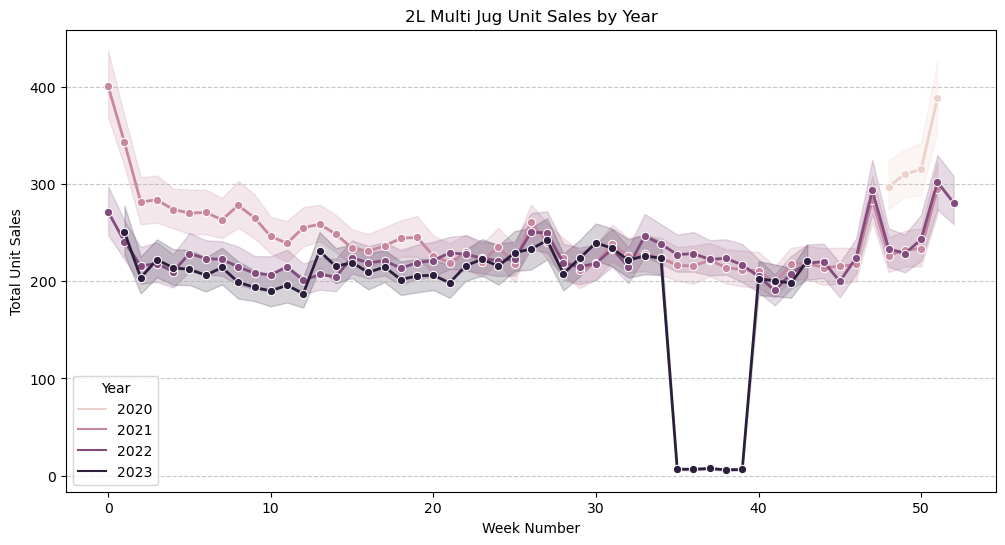

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week_Number', y='UNIT_SALES', data=multi_jug_2l, hue='Year', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('2L Multi Jug Unit Sales by Year')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

#### Data shows a big demand in the first and last few weeks of the year. There is a big data dip between week 35 and week 40 of the year 2023.

### Hypothesis 1: Does the packaging type significantly affect the unit sales of beverages in the market?

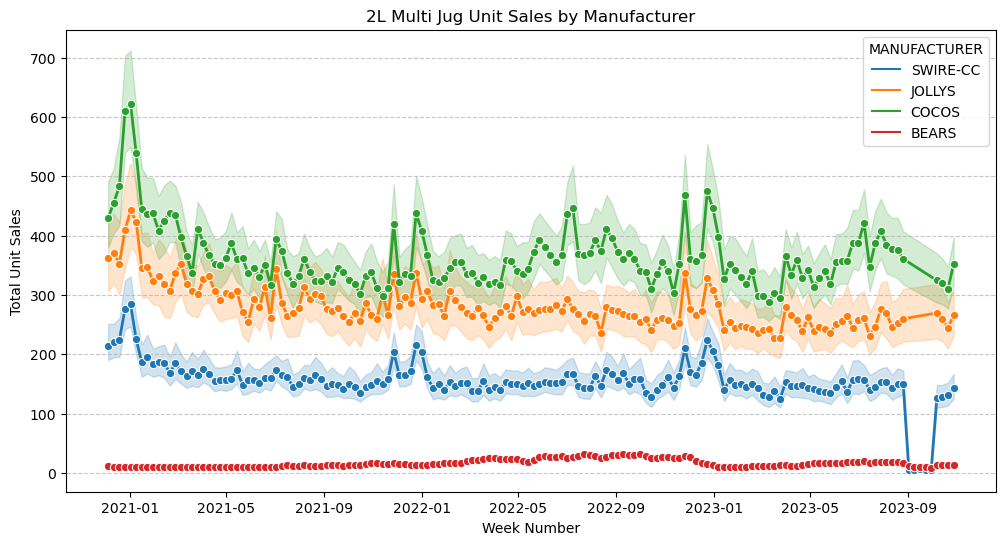

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='UNIT_SALES', data=multi_jug_2l, hue='MANUFACTURER', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('2L Multi Jug Unit Sales by Manufacturer')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

#### Filtering more into sales by manufacturer, It shows Swire caused the dip of sales in the year 2023.

#### Swire is the 3rd most seller of 2l Multi Jugs.

### Lets go deeper adding category in the filter.

In [13]:
multi_jug_2l['CATEGORY'].value_counts()

CATEGORY
SSD                1868323
SPARKLING WATER      27925
Name: count, dtype: int64

#### There is no data that shows Energy on the market category in the 2l MultiJug package.

In [14]:
multi_jug_2l['CALORIC_SEGMENT'].value_counts()

CALORIC_SEGMENT
REGULAR       1263878
DIET/LIGHT     632368
Name: count, dtype: int64

#### DIET is the more prominent calorig segment but there are still observations available.

#### Let's filter the data with diet and 2l MultiJug.

In [15]:
diet_multi_jug_2l = multi_jug_2l[multi_jug_2l['CALORIC_SEGMENT']=='DIET/LIGHT']

In [16]:
diet_multi_jug_2l.head()

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM,Week_Number,Year
69,2021-08-14,1065,DIET/LIGHT,SSD,259.0,501.46,SWIRE-CC,DIET PEPPY,2L MULTI JUG,DIET PEPPY GENTLE DRINK RED PEPPER COLA DIET ...,32,2021
92,2022-07-30,331,DIET/LIGHT,SSD,774.0,1471.95,COCOS,DIET BUBBLE JOY ADVANTAGEOUS,2L MULTI JUG,DIET BUBBLE JOY ADVANTAGEOUS GENTLE DRINK COLA...,30,2022
96,2021-11-13,216,DIET/LIGHT,SSD,18.0,21.85,SWIRE-CC,DIET MITE PURE ZERO,2L MULTI JUG,DIET MITE PURE ZERO GENTLE DRINK COLA DIET JUG...,45,2021
110,2022-10-01,794,DIET/LIGHT,SSD,286.0,541.10,COCOS,DIET BUBBLE JOY ADVANTAGEOUS CF,2L MULTI JUG,DIET BUBBLE JOY ADVANTAGEOUS CAFFEINE FREE GEN...,39,2022
156,2021-03-06,405,DIET/LIGHT,SSD,506.0,734.41,SWIRE-CC,DIET PEPPY,2L MULTI JUG,DIET PEPPY GENTLE DRINK RED PEPPER COLA DIET ...,9,2021


In [17]:
diet_multi_jug_2l.shape

(632368, 12)

#### We have 632k observations with the current filter.

### Hypothesis 2: Is there a seasonal pattern to the sales of 2L Multi Jug beverages, particularly a surge in demand at the beginning and end of the year?

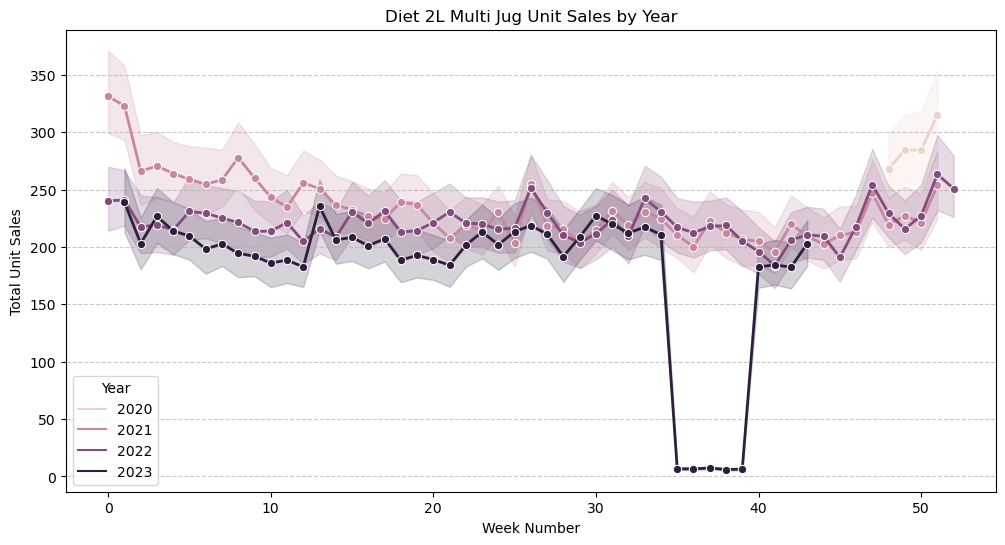

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week_Number', y='UNIT_SALES', data=diet_multi_jug_2l, hue='Year', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Diet 2L Multi Jug Unit Sales by Year')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

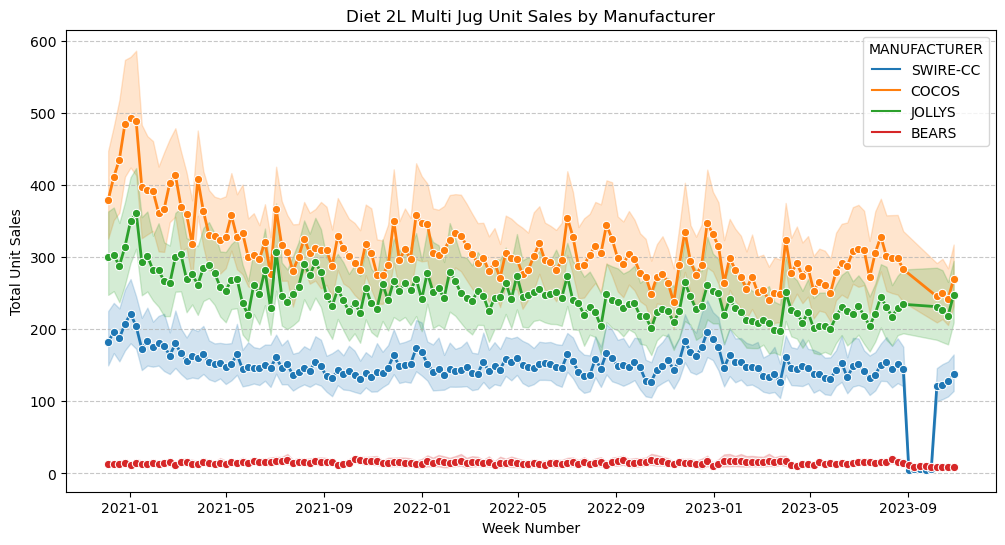

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='UNIT_SALES', data=diet_multi_jug_2l, hue='MANUFACTURER', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Diet 2L Multi Jug Unit Sales by Manufacturer')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

#### In-depth view of Swire on 2L Diet

In [20]:
swire_diet_multi_jug_2l = diet_multi_jug_2l[diet_multi_jug_2l['MANUFACTURER']=='SWIRE-CC']

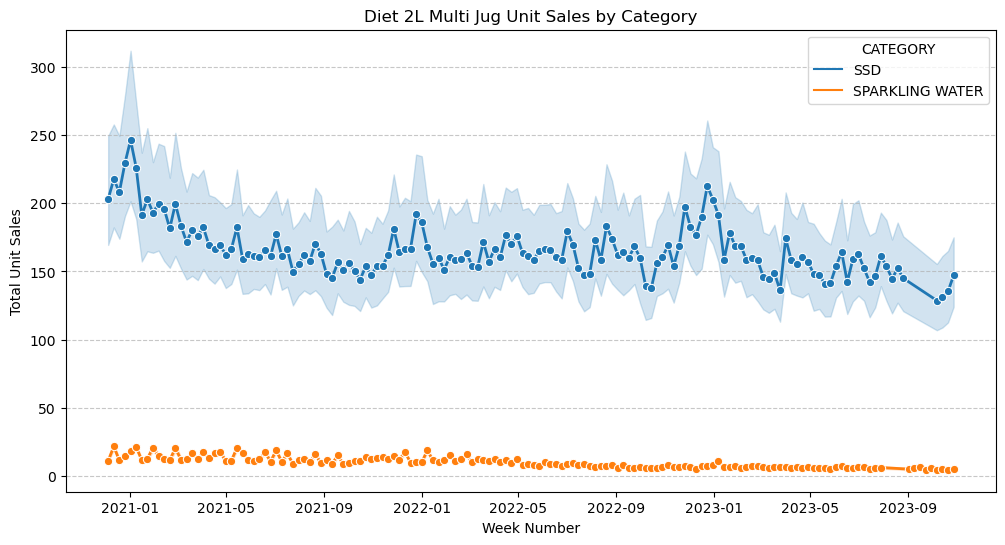

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='UNIT_SALES', data=swire_diet_multi_jug_2l, hue='CATEGORY', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Diet 2L Multi Jug Unit Sales by Category')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

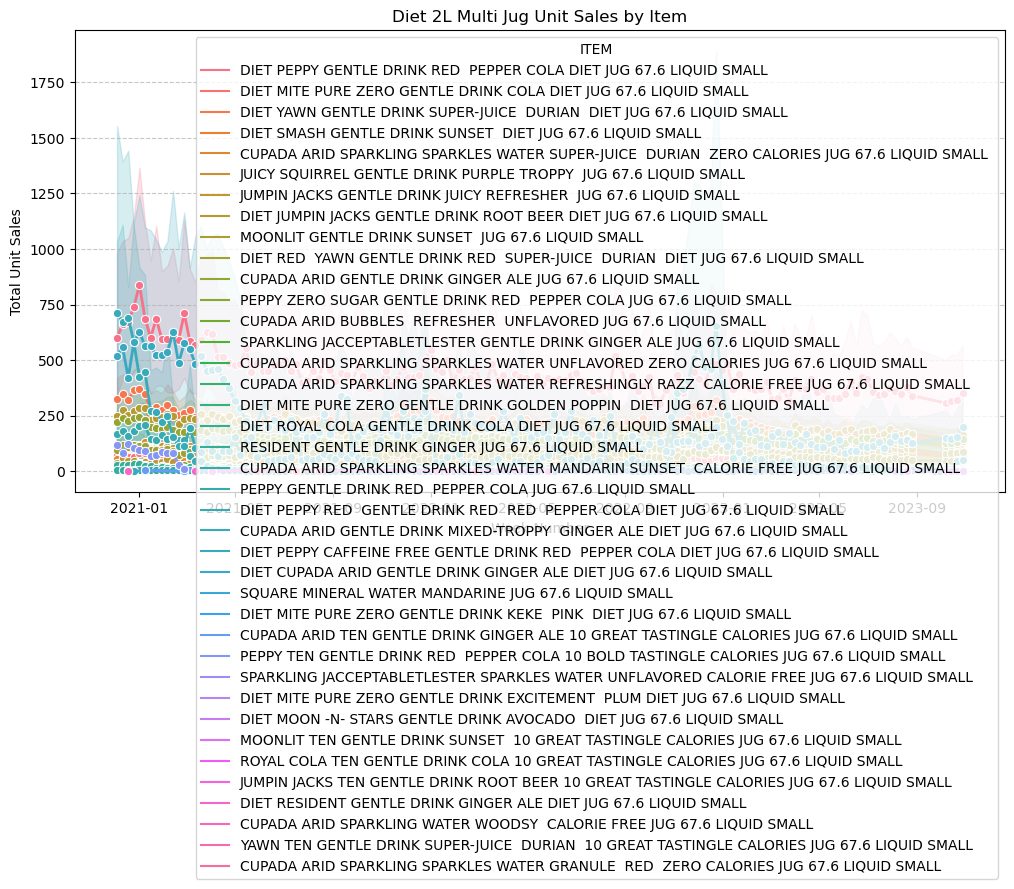

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATE', y='UNIT_SALES', data=swire_diet_multi_jug_2l, hue='ITEM', marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Diet 2L Multi Jug Unit Sales by Item')
plt.xlabel('Week Number')
plt.ylabel('Total Unit Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for the y-axis
plt.show()

### Results Summary
The focus was on evaluating the market demand for a new product, "Diet Energy Moonlit Cassava 2L Multi Jug." The analysis covered various dimensions such as caloric segment, market category, manufacturer, brand, package type, and flavor.

- The "2L Multi Jug" is identified as one of the top-selling package types in the market, indicating a favorable consumer preference for this package size.
- A significant sales dip was observed between weeks 35 and 40 of the year 2023, attributed to Swire, the manufacturer, which is ranked as the third most significant seller of 2L Multi Jugs.
- The data revealed no records of "Cassava" flavor in the existing market data, suggesting this flavor could either represent a niche market opportunity or a risk due to untested consumer acceptance.
- The absence of "Energy" as a market category in the 2L Multi Jug package data suggests a potential gap in the market or a misalignment with existing product categorizations.


## Possible Modelling Approaches
Given these insights, several modeling approaches can be considered to further analyze the product's potential market performance and guide decision-making:

- Time Series Forecasting: Utilize ARIMA (Autoregressive Integrated Moving Average) or SARIMA (Seasonal ARIMA) models to forecast future sales of the "2L Multi Jug." These models can help predict the product's demand based on historical sales data, taking into account seasonality and trends observed in the dataset.

- Market Segmentation and Clustering: Apply clustering techniques such as K-means or hierarchical clustering to segment the market based on consumer preferences, sales performance, and other relevant factors. This analysis can identify distinct consumer segments that may prefer the "Diet Energy Moonlit Cassava 2L Multi Jug" over other products.

- Sentiment Analysis: If customer reviews or social media data are available, sentiment analysis can be performed to gauge consumer sentiment towards the product's attributes (e.g., flavor, package type). Natural Language Processing (NLP) techniques can be used to extract insights from textual data, providing valuable feedback on consumer preferences and potential areas for product improvement.

- Regression Analysis: Conduct regression analysis to understand the relationship between various factors (e.g., marketing spend, distribution channels, price) and sales performance. This can help identify key drivers of sales for the "Diet Energy Moonlit Cassava 2L Multi Jug" and optimize marketing strategies.

- Machine Learning for Demand Forecasting: Implement machine learning models such as Random Forest or Gradient Boosting Machines (GBMs) to predict product demand. These models can handle complex interactions between different variables and improve forecasting accuracy by learning from historical data patterns.